In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Problem 11: climate-related deaths

The Centre for Research on the Epidemiology of Disasters (CRED) within the University of Leuven maintains an [Emergency Events database](https://public.emdat.be/) covering over 20,000 mass disasters globally, starting from 1900.

In [31]:
# load Emergency Events data
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/emergency_events.csv'
df = pd.read_csv(path,index_col='Year')
df

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Continent,Total Deaths
Year,,,,,,,
1900,Natural,Climatological,Drought,Drought,Cabo Verde,Africa,11000.0
1900,Natural,Climatological,Drought,Drought,India,Asia,1250000.0
1904,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Asia,NaN
1906,Natural,Hydrological,Flood,NaN,Belgium,Europe,6.0
1906,Natural,Hydrological,Flood,NaN,Belgium,Europe,NaN
...,...,...,...,...,...,...,...
2022,Natural,Hydrological,Flood,NaN,Yemen,Asia,17.0
2022,Natural,Hydrological,Flood,NaN,South Africa,Africa,3.0
2022,Natural,Hydrological,Flood,NaN,South Africa,Africa,4.0


Calculate the total number of deaths for each year and disaster type.
Save the results in a new DataFrame called `deaths`, with the year as the index and the disaster types as the columns.

In [43]:
deaths = df.pivot_table(values='Total Deaths', index=df.index, columns='Disaster Type', aggfunc='sum')
# convert all NaN values to 0
deaths = deaths.fillna(0)
deaths

Disaster Type,Drought,Extreme temperature,Flood,Storm
Year,,,,
1900,1261000.0,0.0,300.0,6000.0
1902,0.0,0.0,0.0,600.0
1903,0.0,0.0,250.0,163.0
1904,0.0,0.0,0.0,0.0
1905,0.0,0.0,0.0,240.0
...,...,...,...,...
2018,0.0,715.0,2881.0,1707.0
2019,85.0,2909.0,5149.0,2514.0
2020,45.0,6343.0,6185.0,1752.0


In [44]:
# load world population data as a Series
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/world_population.csv'
pop = pd.read_csv(path,index_col='Year').squeeze()
pop

Year
1900    1.647405e+09
1901    1.658786e+09
1902    1.672564e+09
1903    1.687013e+09
1904    1.701647e+09
            ...     
2018    7.631081e+09
2019    7.713458e+09
2020    7.794789e+09
2021    7.874956e+09
2022    7.953943e+09
Name: world_population, Length: 123, dtype: float64

Compute the number of deaths per 100,000 population by year and disaster type.
Assign the results to a new DataFrame called `rel_deaths`.

Hint: you want to divide each row of the `deaths` DataFrame by the corresponding population.
To do this, you need to use the `.divide()` DataFrame method with the `axis` parameter set to 0.

In [49]:
rel_deaths = deaths.divide(pop, axis=0) * 100000
rel_deaths

Disaster Type,Drought,Extreme temperature,Flood,Storm
Year,,,,
1900,76.544625,0.000000,0.018210,0.364209
1901,NaN,NaN,NaN,NaN
1902,0.000000,0.000000,0.000000,0.035873
1903,0.000000,0.000000,0.014819,0.009662
1904,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2018,0.000000,0.009370,0.037753,0.022369
2019,0.001102,0.037713,0.066753,0.032592
2020,0.000577,0.081375,0.079348,0.022477


Calculate the average annual number of deaths per 100,000 people by disaster type for each decade.
Create a bar plot to visualize the results, applying a logarithmic scale to the y-axis for better readability.
To achieve this, set the `logy` parameter of the `plot` method to `True`.

Hint: group by `10*(rel_deaths.index//10)`

In [47]:
# decade average
decade_avg = rel_deaths.groupby(10 * (rel_deaths.index // 10)).mean()
decade_avg

Disaster Type,Drought,Extreme temperature,Flood,Storm
Year,,,,
1900,10.934946,0.000000,0.005347,0.151228
1910,0.473980,0.000000,0.561731,0.328583
1920,23.452383,0.000000,0.020990,0.609998
1930,0.000000,0.007580,20.337920,0.425429
1940,14.531914,0.000000,0.404422,0.535928
1950,0.000000,0.005377,6.939324,0.111376
1960,4.522922,0.003456,0.099428,0.409967
1970,0.303158,0.003830,0.175489,0.953322
1980,1.193244,0.011116,0.107240,0.094923


<Axes: xlabel='Year'>

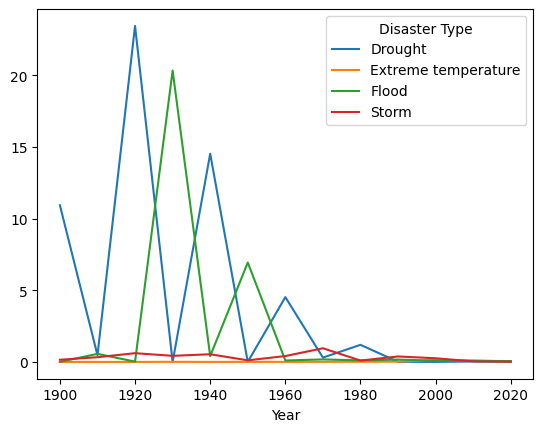

In [48]:
# plot results
decade_avg.plot()